<a href="https://colab.research.google.com/github/wiv33/A-Learning-python/blob/master/machine-learning/_000_hello_machine/_000_basic/_003_cuk_edu/_005_3_computer_vision/08_voc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Errata

1주차 25:00 경의 강의 내용 중 softmax의 미분은 출력값의 인덱스인 i와 미분할 변수의 index j를 나누어서 별도로 하여야 합니다.  이에 따라 softmax의 미분과 cross entropy의 미분 오류를 다음과 같이 정정합니다.

1. softmax의 미분     
    
    Softmax의 정의:  
$$
\begin{align*}
q_i &= {e^{z_i}\over\sum_k e^{z_k}}\\
\end{align*}
$$
$q_i$를 $z_j$에 대하여 미분하기:
$$
{\partial q_i\over \partial z_j} = {\partial e^{z_i}\over\partial z_j}{1\over\sum_k e^{z_k}} + e^{z_i}{\partial \over \partial z_j}\left({1\over\sum_k e^{z_k}} \right)
$$
위 식에서 왼쪽 항은 분자에 대한 미분이고 오른쪽 항은 분모에 대한 미분입니다.  
먼저 분자에 대한 미분은 다음과 같습니다.
$$
{\partial e^{z_i}\over \partial z_j} = 
\begin{cases}
 e^{z_i} & \text{ if } i = j \\ 
 0 & \text{ if } i \neq j 
\end{cases}
$$
위 처럼 복잡한 식을 하나로 만들기 위해서 $i=j$ 이면 1이고 $i\neq j$이면 0인 변수를 정의합니다.
$$
\delta_{ij} \equiv
\begin{cases}
 1 & \text{ if } i = j \\ 
 0 & \text{ if } i \neq j 
\end{cases}
$$
위의 정의를 이용하면 분자의 미분식은 간단하게 다음과 같이 표시됩니다.
$$
{\partial e^{z_i}\over \partial z_j} =  e^{z_i}\delta_{ij}
$$
다음은 오른 쪽 항에 포함된 미분을 계산합니다.
$$
{\partial \over \partial z_j}\left({1\over\sum_k e^{z_k}} \right)
={\partial \over \partial z_j}\left(\sum_k e^{z_k}\right)^{-1}
=-\left(\sum_k e^{z_k}\right)^{-2}{\partial \over \partial z_j}\left(\sum_k e^{z_k}\right)\\
=-\left(\sum_k e^{z_k}\right)^{-2}e^{z_j}
$$
마지막 등식은 여러 개의 $k$의 합에서 오직 $j$와 관련된 미분만 살아남기 때문입니다.
이제 전체 softmax의 미분은 다음과 같습니다.
$$
{\partial q_i\over \partial z_j} = {e^{z_i}\over\sum_k e^{z_k}}\delta_{ij}
-{e^{z_i}e^{z_j}\over\left(\sum_k e^{z_k}\right)^2 }\\
=q_i\delta_{ij} - q_iq_j = q_i(\delta_{ij}-q_j)\
$$
중간정리: softmax의 미분  
$$
{\partial q_i\over \partial z_j}= q_i(\delta_{ij}-q_j)
$$

2. Cross entropy의 미분

    Cross entropy의 정의는 다음과 같습니다.
$$
    H = -\sum_i p_i \log q_i\\
$$
이것을 미분하면 다음과 같습니다.
$$
\begin{align*}
-{\partial H\over \partial z_j} &= \sum_i{p_i\over q_i}\cdot{\partial q_i\over \partial z_j}\\
&=\sum_i{p_i\over q_i}\cdot q_i(\delta_{ij}-q_j)\\
&= \sum_i p_i\delta_{ij}-\sum_ip_i q_j
\end{align*}
$$
첫번째 등식은 체인룰입니다. 두번째 등식은 앞의 softmax의 미분입니다.  
여기서 첫번째 항인, $p_i\delta_{ij}$의 합계는 $\delta_{ij}$에 의해서 $j$인 항만 남게 됩니다.
$$
\sum_i p_i\delta_{ij} = p_j
$$
두 번째 항에서는 $\sum p_i = 1$을 이용합니다.
$$
\sum_i p_i q_j = q_j\sum_i p_i = q_j
$$
그러면 cross entropy의 미분은 다음과 같이 간단하게 정리할 수 있습니다.  
Cross Entropy의 미분(일반식):    
$$
-{\partial H\over \partial z_j} = p_j - q_j
$$
통상적으로는 $p_j$ 중에서 하나만 1이고 나머지는 0입니다. 그 인덱스를 $c$라고 합시다.
그러면 cross entropy의 미분은 다음과 같습니다. (One-Hot 인코딩을 GT에 사용하였을 때)
$$
\begin{align*}
-{\partial H\over \partial z_j} &= \begin{cases}
 1 - q_j & \text{ for } j = c \\ 
 -q_j & \text{ for } j \neq c 
\end{cases}\\ 
&=\delta_{jc} - q_j
\end{align*}
$$

3. Binary cross entropy의 미분

  Binary cross entropy는 가상으로 두 개가 출력되는 것을 가정할 뿐 실제로는 출력이 한개 $q_1$ 뿐입니다. 이 경우 cross entropy의 미분은 앞의 유도식과 동일합니다. 
$$
-{\partial H\over \partial z_1} = p_1 - q_1 = p - q
$$

# Pascal VOC database

upgrade gdown  
(필요한 파일 다운로드 용)

In [ ]:
#!rm /mydrive/yolo4_weight.h5

#!rm yolov4.weights


In [1]:
!pip install --upgrade gdown

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**google drive 마운트**

mount 시에 cell 내의 링크를 클릭하고 토큰 값을 복사하여 입력 후 [Enter]를 입력합니다.

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')
!ln -s /content/gdrive/My\ Drive/ /mydrive

Mounted at /content/gdrive


google drive를 이용한 다운로드

In [3]:
import gdown
md5 = '6cd6e144f989b92b3379bac3b3de84fd'
#url = 'https://drive.google.com/file/d/14eyB2lkxrG83fGy4t395sgZqADOYJ_yE/view?usp=sharing'
url = 'https://drive.google.com/uc?id=14eyB2lkxrG83fGy4t395sgZqADOYJ_yE'
output = '/mydrive/VOCtrainval_11-May-2012.tar'
gdown.cached_download(url, output, md5=md5)

Computing MD5: /mydrive/VOCtrainval_11-May-2012.tar
MD5 matches: /mydrive/VOCtrainval_11-May-2012.tar


'/mydrive/VOCtrainval_11-May-2012.tar'

만일 google drive가 되지 않을 때에는 정식 repo 혹은 mirror repor로 부터 다운로드

In [ ]:
# Pascal VOC 2012 trainval official
#!wget -c http://host.robots.ox.ac.uk/pascal/VOC/voc2012/VOCtrainval_11-May-2012.tar -O /mydrive/VOCtrainval_11-May-2012.tar


# Pascal VOC 2012 trainval mirror from Joseph Redmon's site
#!wget -c http://pjreddie.com/media/files/VOCtrainval_11-May-2012.tar -O /mydrive/VOCtrainval_11-May-2012.tar

소스 코드 복사

In [4]:
%cd /content
!git clone https://github.com/shevious/keras-yolo4.git

/content
Cloning into 'keras-yolo4'...
remote: Enumerating objects: 96, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 96 (delta 8), reused 12 (delta 4), pack-reused 72
Unpacking objects: 100% (96/96), done.


실행 폴더 이동

In [5]:
%cd /content/keras-yolo4

/content/keras-yolo4


voc 2012 압축 해제

In [ ]:
!tar xvf /mydrive/VOCtrainval_11-May-2012.tar

data로 심볼릭 링크 (코드 내에서 data/VOC2012 등을 참조)

In [7]:
!ln -s VOCdevkit data

**Pascal VOC 2012 parsing**  


In [8]:
!ls data/VOC2012/Annotations | head -5

2007_000027.xml
2007_000032.xml
2007_000033.xml
2007_000039.xml
2007_000042.xml


In [9]:
!cat data/VOC2012/Annotations/2007_000027.xml

<annotation>
	<folder>VOC2012</folder>
	<filename>2007_000027.jpg</filename>
	<source>
		<database>The VOC2007 Database</database>
		<annotation>PASCAL VOC2007</annotation>
		<image>flickr</image>
	</source>
	<size>
		<width>486</width>
		<height>500</height>
		<depth>3</depth>
	</size>
	<segmented>0</segmented>
	<object>
		<name>person</name>
		<pose>Unspecified</pose>
		<truncated>0</truncated>
		<difficult>0</difficult>
		<bndbox>
			<xmin>174</xmin>
			<ymin>101</ymin>
			<xmax>349</xmax>
			<ymax>351</ymax>
		</bndbox>
		<part>
			<name>head</name>
			<bndbox>
				<xmin>169</xmin>
				<ymin>104</ymin>
				<xmax>209</xmax>
				<ymax>146</ymax>
			</bndbox>
		</part>
		<part>
			<name>hand</name>
			<bndbox>
				<xmin>278</xmin>
				<ymin>210</ymin>
				<xmax>297</xmax>
				<ymax>233</ymax>
			</bndbox>
		</part>
		<part>
			<name>foot</name>
			<bndbox>
				<xmin>273</xmin>
				<ymin>333</ymin>
				<xmax>297</xmax>
				<ymax>354</ymax>
			</bndbox>
		</part>
		<part>
			<name>foot<

xml 데이터를 읽어들이고 객체의 bounding box를 parsing하여,
`2012_train.txt` 혹은 `2012_val.txt` 생성

In [10]:
import xml.etree.ElementTree as ET
from os import getcwd

#sets=[('2012', 'train'), ('2012', 'val'), ('2012', 'test')]
sets=[('2012', 'train'), ('2012', 'val')]
#sets=[('2007', 'train'), ('2007', 'val'), ('2007', 'test')]

classes = ["aeroplane", "bicycle", "bird", "boat", "bottle", "bus", "car", "cat", "chair", "cow", "diningtable", "dog", "horse", "motorbike", "person", "pottedplant", "sheep", "sofa", "train", "tvmonitor"]


def convert_annotation(year, image_id, list_file):
    in_file = open('data/VOC%s/Annotations/%s.xml'%(year, image_id))
    tree=ET.parse(in_file)
    root = tree.getroot()

    for obj in root.iter('object'):
        difficult = obj.find('difficult').text
        cls = obj.find('name').text
        if cls not in classes or int(difficult)==1:
            continue
        cls_id = classes.index(cls)
        xmlbox = obj.find('bndbox')
        b = (int(xmlbox.find('xmin').text), int(xmlbox.find('ymin').text), int(xmlbox.find('xmax').text), int(xmlbox.find('ymax').text))
        list_file.write(" " + ",".join([str(a) for a in b]) + ',' + str(cls_id))

wd = getcwd()

for year, image_set in sets:
    image_ids = open('data/VOC%s/ImageSets/Main/%s.txt'%(year, image_set)).read().strip().split()
    list_file = open('%s_%s.txt'%(year, image_set), 'w')
    for image_id in image_ids:
        list_file.write('%s/data/VOC%s/JPEGImages/%s.jpg'%(wd, year, image_id))
        convert_annotation(year, image_id, list_file)
        list_file.write('\n')
    list_file.close()

In [11]:
!head -5 2012_train.txt
!head -5 2012_val.txt

/content/keras-yolo4/data/VOC2012/JPEGImages/2008_000008.jpg 53,87,471,420,12 158,44,289,167,14
/content/keras-yolo4/data/VOC2012/JPEGImages/2008_000015.jpg 270,1,378,176,4 57,1,164,150,4
/content/keras-yolo4/data/VOC2012/JPEGImages/2008_000019.jpg 139,2,372,197,11 165,66,318,236,11 361,1,480,112,11
/content/keras-yolo4/data/VOC2012/JPEGImages/2008_000023.jpg 6,1,314,262,19 40,97,121,411,4 137,36,169,109,14 180,36,216,104,14 96,39,123,103,14
/content/keras-yolo4/data/VOC2012/JPEGImages/2008_000028.jpg 158,199,231,240,6 47,202,94,238,6
/content/keras-yolo4/data/VOC2012/JPEGImages/2008_000002.jpg 34,11,448,293,19
/content/keras-yolo4/data/VOC2012/JPEGImages/2008_000003.jpg 46,11,500,333,18 62,190,83,243,14
/content/keras-yolo4/data/VOC2012/JPEGImages/2008_000007.jpg 1,230,428,293,3
/content/keras-yolo4/data/VOC2012/JPEGImages/2008_000009.jpg 217,161,294,221,9 465,167,500,218,9
/content/keras-yolo4/data/VOC2012/JPEGImages/2008_000016.jpg 91,15,392,353,19


# COCO dataset

coco 데이터셋 홈페이지:  
https://cocodataset.org/  
  
coco 데이터셋 다운로드 페이지:  
https://cocodataset.org/#download  

In [12]:
!wget -c 'http://images.cocodataset.org/annotations/annotations_trainval2017.zip'

--2022-06-23 10:55:58--  http://images.cocodataset.org/annotations/annotations_trainval2017.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 52.216.18.144
Connecting to images.cocodataset.org (images.cocodataset.org)|52.216.18.144|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 252907541 (241M) [application/zip]
Saving to: ‘annotations_trainval2017.zip’

annotations_trainva 100%[===================>] 241.19M  45.5MB/s    in 5.7s    

2022-06-23 10:56:04 (42.2 MB/s) - ‘annotations_trainval2017.zip’ saved [252907541/252907541]



In [ ]:
!unzip -o annotations_trainval2017.zip -d mscoco2017

Archive:  annotations_trainval2017.zip
  inflating: mscoco2017/annotations/instances_train2017.json  
  inflating: mscoco2017/annotations/instances_val2017.json  
  inflating: mscoco2017/annotations/captions_train2017.json  
  inflating: mscoco2017/annotations/captions_val2017.json  
  inflating: mscoco2017/annotations/person_keypoints_train2017.json  
  inflating: mscoco2017/annotations/person_keypoints_val2017.json  


Train data를 다운로드 하기위해서는 다음의 명령어를 수행  
(주의: 용량 약 18GB)

In [ ]:
# COCO train data 다운로드
#!wget -c 'http://images.cocodataset.org/zips/train2017.zip' -O /mydrive/train2017.zip

다운로드 2017 val 이미지

In [ ]:
!wget -c 'http://images.cocodataset.org/zips/val2017.zip' -O /mydrive/val2017.zip

--2021-11-01 04:31:24--  http://images.cocodataset.org/zips/val2017.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 52.217.47.44
Connecting to images.cocodataset.org (images.cocodataset.org)|52.217.47.44|:80... connected.
HTTP request sent, awaiting response... 416 Requested Range Not Satisfiable

    The file is already fully retrieved; nothing to do.



In [ ]:
!unzip -o /mydrive/val2017.zip -d mscoco2017

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
 extracting: mscoco2017/val2017/000000212226.jpg  
 extracting: mscoco2017/val2017/000000231527.jpg  
 extracting: mscoco2017/val2017/000000578922.jpg  
 extracting: mscoco2017/val2017/000000062808.jpg  
 extracting: mscoco2017/val2017/000000119038.jpg  
 extracting: mscoco2017/val2017/000000114871.jpg  
 extracting: mscoco2017/val2017/000000463918.jpg  
 extracting: mscoco2017/val2017/000000365745.jpg  
 extracting: mscoco2017/val2017/000000320425.jpg  
 extracting: mscoco2017/val2017/000000481404.jpg  
 extracting: mscoco2017/val2017/000000314294.jpg  
 extracting: mscoco2017/val2017/000000335328.jpg  
 extracting: mscoco2017/val2017/000000513688.jpg  
 extracting: mscoco2017/val2017/000000158548.jpg  
 extracting: mscoco2017/val2017/000000132116.jpg  
 extracting: mscoco2017/val2017/000000415238.jpg  
 extracting: mscoco2017/val2017/000000321333.jpg  
 extracting: mscoco2017/val2017/000000081738.jpg  
 extracting: mscoco2017/val2017/000000577584.j

COCO annotation 만들기  
`coco_annotation.py`  

In [ ]:
year = '2017'

# train 혹은 val 선택
#trainval = 'train'
trainval = 'val'
import json
from collections import defaultdict

name_box_id = defaultdict(list)
id_name = dict()
f = open(
    "mscoco2017/annotations/instances_%s2017.json" % trainval,
        encoding='utf-8')
data = json.load(f)

annotations = data['annotations']
for ant in annotations:
    id = ant['image_id']
    name = 'mscoco2017/%s2017/%012d.jpg' % (trainval, id)
    cat = ant['category_id']

    if cat >= 1 and cat <= 11:
        cat = cat - 1
    elif cat >= 13 and cat <= 25:
        cat = cat - 2
    elif cat >= 27 and cat <= 28:
        cat = cat - 3
    elif cat >= 31 and cat <= 44:
        cat = cat - 5
    elif cat >= 46 and cat <= 65:
        cat = cat - 6
    elif cat == 67:
        cat = cat - 7
    elif cat == 70:
        cat = cat - 9
    elif cat >= 72 and cat <= 82:
        cat = cat - 10
    elif cat >= 84 and cat <= 90:
        cat = cat - 11

    name_box_id[name].append([ant['bbox'], cat])

f = open('%s.txt' % trainval, 'w')
for key in name_box_id.keys():
    f.write(key)
    box_infos = name_box_id[key]
    for info in box_infos:
        x_min = int(info[0][0])
        y_min = int(info[0][1])
        x_max = x_min + int(info[0][2])
        y_max = y_min + int(info[0][3])

        box_info = " %d,%d,%d,%d,%d" % (
            x_min, y_min, x_max, y_max, int(info[1]))
        f.write(box_info)
    f.write('\n')
f.close()

In [ ]:
!cat val.txt | head -5

mscoco2017/val2017/000000289343.jpg 473,395,511,423,16 204,235,264,412,0 0,499,339,605,13 204,304,256,456,1
mscoco2017/val2017/000000061471.jpg 272,200,423,479,16 181,86,208,159,39 174,0,435,220,61
mscoco2017/val2017/000000472375.jpg 124,196,496,552,16 59,50,560,440,3 288,70,315,96,41 312,76,339,99,41
mscoco2017/val2017/000000520301.jpg 112,154,479,633,16
mscoco2017/val2017/000000579321.jpg 200,89,600,340,16 94,0,334,211,0


# convert YOLOv4 weights to Keras h5

In [13]:
import gdown
md5 = '00a4878d05f4d832ab38861b32061283'
url = 'https://drive.google.com/uc?id=1cewMfusmPjYWbrnuJRuKhPMwRe_b9PaT'
output = 'yolov4.weights'
#gdown.download(url, output, quiet=False)
gdown.cached_download(url, output, md5=md5)

Cached Downloading: yolov4.weights

 	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses. 

You may still be able to access the file from the browser:

	 https://drive.google.com/uc?id=1cewMfusmPjYWbrnuJRuKhPMwRe_b9PaT 



Access denied with the following error:


FileNotFoundError: ignored

file_name: `convert.py`  

다음의 코드는 yolo의 weights파일을 keras 형식으로 변환하기 위한 것입니다.  
코드는 참고용이므로, 실행만 정상적으로 되는 지 확인하시면 됩니다.

In [ ]:
import os
import colorsys

import numpy as np
from tensorflow.keras import backend as K
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Input

from yolo4.model import yolo_eval, yolo4_body
from yolo4.utils import letterbox_image

from PIL import Image, ImageFont, ImageDraw
from timeit import default_timer as timer
import matplotlib.pyplot as plt

from operator import itemgetter

import tensorflow as tf

class Yolo4(object):
    def get_class(self):
        classes_path = os.path.expanduser(self.classes_path)
        with open(classes_path) as f:
            class_names = f.readlines()
        class_names = [c.strip() for c in class_names]
        return class_names

    def get_anchors(self):
        anchors_path = os.path.expanduser(self.anchors_path)
        with open(anchors_path) as f:
            anchors = f.readline()
        anchors = [float(x) for x in anchors.split(',')]
        return np.array(anchors).reshape(-1, 2)

    def load_yolo(self):
        model_path = os.path.expanduser(self.model_path)
        assert model_path.endswith('.h5'), 'Keras model or weights must be a .h5 file.'

        self.class_names = self.get_class()
        self.anchors = self.get_anchors()

        num_anchors = len(self.anchors)
        num_classes = len(self.class_names)

        # Generate colors for drawing bounding boxes.
        hsv_tuples = [(x / len(self.class_names), 1., 1.)
                      for x in range(len(self.class_names))]
        self.colors = list(map(lambda x: colorsys.hsv_to_rgb(*x), hsv_tuples))
        self.colors = list(
            map(lambda x: (int(x[0] * 255), int(x[1] * 255), int(x[2] * 255)),
                self.colors))

        #self.sess = K.get_session()

        # Load model, or construct model and load weights.
        self.yolo4_model = yolo4_body(Input(shape=(608, 608, 3)), num_anchors//3, num_classes)
        #print(self.yolo4_model.summary())
        #print('num_anchors =', num_anchors)
        #print('num_classes =', num_classes)

        # Read and convert darknet weight
        print('Loading weights.')
        weights_file = open(self.weights_path, 'rb')
        major, minor, revision = np.ndarray(
            shape=(3, ), dtype='int32', buffer=weights_file.read(12))
        if (major*10+minor)>=2 and major<1000 and minor<1000:
            seen = np.ndarray(shape=(1,), dtype='int64', buffer=weights_file.read(8))
        else:
            seen = np.ndarray(shape=(1,), dtype='int32', buffer=weights_file.read(4))
        print('Weights Header: ', major, minor, revision, seen)

        convs_to_load = []
        bns_to_load = []
        for i in range(len(self.yolo4_model.layers)):
            layer_name = self.yolo4_model.layers[i].name
            if layer_name == 'conv2d':
                convs_to_load.append((0, i))
            elif layer_name.startswith('conv2d_'):
                convs_to_load.append((int(layer_name[7:]), i))
            if layer_name == 'batch_normalization':
                bns_to_load.append((0, i))
            elif layer_name.startswith('batch_normalization_'):
                bns_to_load.append((int(layer_name[20:]), i))

        convs_sorted = sorted(convs_to_load, key=itemgetter(0))
        bns_sorted = sorted(bns_to_load, key=itemgetter(0))
        #print('bns_sorted = ', bns_sorted)

        bn_index = 0
        for i in range(len(convs_sorted)):
            print('Converting ', i)
            if i == 93 or i == 101 or i == 109:
                #no bn, with bias
                weights_shape = self.yolo4_model.layers[convs_sorted[i][1]].get_weights()[0].shape
                bias_shape = self.yolo4_model.layers[convs_sorted[i][1]].get_weights()[0].shape[3]
                filters = bias_shape
                size = weights_shape[0]
                darknet_w_shape = (filters, weights_shape[2], size, size)
                weights_size = np.product(weights_shape)

                conv_bias = np.ndarray(
                    shape=(filters, ),
                    dtype='float32',
                    buffer=weights_file.read(filters * 4))
                conv_weights = np.ndarray(
                    shape=darknet_w_shape,
                    dtype='float32',
                    buffer=weights_file.read(weights_size * 4))
                conv_weights = np.transpose(conv_weights, [2, 3, 1, 0])
                self.yolo4_model.layers[convs_sorted[i][1]].set_weights([conv_weights, conv_bias])
            else:
                #with bn, no bias
                weights_shape = self.yolo4_model.layers[convs_sorted[i][1]].get_weights()[0].shape
                size = weights_shape[0]
                bn_shape = self.yolo4_model.layers[bns_sorted[bn_index][1]].get_weights()[0].shape
                filters = bn_shape[0]
                '''
                print('##')
                print('i = ', i)
                print('bn_index = ', bn_index)
                print('convs_sorted[i][1] = ', convs_sorted[i][1])
                print('bns_sorted[bn_index][1] = ', bns_sorted[bn_index][1])
                print('bn_shape = ', bn_shape)
                print('w layer name = ', self.yolo4_model.layers[convs_sorted[i][1]].name)
                print('bn layer name = ', self.yolo4_model.layers[bns_sorted[bn_index][1]].name)
                '''
                darknet_w_shape = (filters, weights_shape[2], size, size)
                weights_size = np.product(weights_shape)

                conv_bias = np.ndarray(
                    shape=(filters, ),
                    dtype='float32',
                    buffer=weights_file.read(filters * 4))
                bn_weights = np.ndarray(
                    shape=(3, filters),
                    dtype='float32',
                    buffer=weights_file.read(filters * 12))

                bn_weight_list = [
                    bn_weights[0],  # scale gamma
                    conv_bias,  # shift beta
                    bn_weights[1],  # running mean
                    bn_weights[2]  # running var
                ]
                self.yolo4_model.layers[bns_sorted[bn_index][1]].set_weights(bn_weight_list)

                conv_weights = np.ndarray(
                    shape=darknet_w_shape,
                    dtype='float32',
                    buffer=weights_file.read(weights_size * 4))
                conv_weights = np.transpose(conv_weights, [2, 3, 1, 0])
                self.yolo4_model.layers[convs_sorted[i][1]].set_weights([conv_weights])

                bn_index += 1

        weights_file.close()

        self.yolo4_model.save(self.model_path)
        for i in range(len(self.yolo4_model.layers)):
            lens = len(self.yolo4_model.layers[i].get_weights())
            for j in range(lens):
              shape = self.yolo4_model.layers[i].get_weights()[j].shape
              print('i = ', i, 'shape = ', shape)


        if self.gpu_num>=2:
            self.yolo4_model = multi_gpu_model(self.yolo4_model, gpus=self.gpu_num)

        self.input_image_shape = K.placeholder(shape=(2, ))
        self.boxes, self.scores, self.classes = yolo_eval(self.yolo4_model.output, self.anchors,
                len(self.class_names), self.input_image_shape,
                score_threshold=self.score)

    def __init__(self, score, iou, anchors_path, classes_path, model_path, weights_path, gpu_num=1):
        self.score = score
        self.iou = iou
        self.anchors_path = anchors_path
        self.classes_path = classes_path
        self.weights_path = weights_path
        self.model_path = model_path
        self.gpu_num = gpu_num
        self.load_yolo()

    def close_session(self):
        self.sess.close()

if __name__ == '__main__':
    model_path = 'yolo4_weight.h5'
    anchors_path = 'model_data/yolo4_anchors.txt'
    classes_path = 'model_data/coco_classes.txt'
    weights_path = 'yolov4.weights'

    score = 0.5
    iou = 0.5

    model_image_size = (608, 608)

    yolo4_model = Yolo4(score, iou, anchors_path, classes_path, model_path, weights_path)

    #yolo4_model.close_session()

Loading weights.
Weights Header:  0 2 5 [32032000]
Converting  0
Converting  1
Converting  2
Converting  3
Converting  4
Converting  5
Converting  6
Converting  7
Converting  8
Converting  9
Converting  10
Converting  11
Converting  12
Converting  13
Converting  14
Converting  15
Converting  16
Converting  17
Converting  18
Converting  19
Converting  20
Converting  21
Converting  22
Converting  23
Converting  24
Converting  25
Converting  26
Converting  27
Converting  28
Converting  29
Converting  30
Converting  31
Converting  32
Converting  33
Converting  34
Converting  35
Converting  36
Converting  37
Converting  38
Converting  39
Converting  40
Converting  41
Converting  42
Converting  43
Converting  44
Converting  45
Converting  46
Converting  47
Converting  48
Converting  49
Converting  50
Converting  51
Converting  52
Converting  53
Converting  54
Converting  55
Converting  56
Converting  57
Converting  58
Converting  59
Converting  60
Converting  61
Converting  62
Converting  63

/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


i =  1 shape =  (3, 3, 3, 32)
i =  2 shape =  (32,)
i =  2 shape =  (32,)
i =  2 shape =  (32,)
i =  2 shape =  (32,)
i =  5 shape =  (3, 3, 32, 64)
i =  6 shape =  (64,)
i =  6 shape =  (64,)
i =  6 shape =  (64,)
i =  6 shape =  (64,)
i =  8 shape =  (1, 1, 64, 64)
i =  9 shape =  (64,)
i =  9 shape =  (64,)
i =  9 shape =  (64,)
i =  9 shape =  (64,)
i =  11 shape =  (1, 1, 64, 32)
i =  12 shape =  (32,)
i =  12 shape =  (32,)
i =  12 shape =  (32,)
i =  12 shape =  (32,)
i =  14 shape =  (3, 3, 32, 64)
i =  15 shape =  (64,)
i =  15 shape =  (64,)
i =  15 shape =  (64,)
i =  15 shape =  (64,)
i =  18 shape =  (1, 1, 64, 64)
i =  19 shape =  (1, 1, 64, 64)
i =  20 shape =  (64,)
i =  20 shape =  (64,)
i =  20 shape =  (64,)
i =  20 shape =  (64,)
i =  21 shape =  (64,)
i =  21 shape =  (64,)
i =  21 shape =  (64,)
i =  21 shape =  (64,)
i =  25 shape =  (1, 1, 128, 64)
i =  26 shape =  (64,)
i =  26 shape =  (64,)
i =  26 shape =  (64,)
i =  26 shape =  (64,)
i =  29 shape =  (3, 3,

In [ ]:
!cp yolo4_weight.h5 /mydrive

**YOLO v4 test with pretrained weights**

In [ ]:
%cd /content/keras-yolo4
!wget -c 'https://github.com/kotech1/computervision/raw/master/img/dog.jpg'

/content/keras-yolo4
--2021-11-01 04:32:34--  https://github.com/kotech1/computervision/raw/master/img/dog.jpg
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/kotech1/computervision/master/img/dog.jpg [following]
--2021-11-01 04:32:34--  https://raw.githubusercontent.com/kotech1/computervision/master/img/dog.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 163759 (160K) [image/jpeg]
Saving to: ‘dog.jpg’

dog.jpg             100%[===================>] 159.92K  --.-KB/s    in 0.02s   

2021-11-01 04:32:34 (7.17 MB/s) - ‘dog.jpg’ saved [163759/163759]



Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 608, 608, 3) 0                                            
__________________________________________________________________________________________________
conv2d_110 (Conv2D)             (None, 608, 608, 32) 864         input_3[0][0]                    
__________________________________________________________________________________________________
batch_normalization_107 (BatchN (None, 608, 608, 32) 128         conv2d_110[0][0]                 
__________________________________________________________________________________________________
mish_72 (Mish)                  (None, 608, 608, 32) 0           batch_normalization_107[0][0]    
____________________________________________________________________________________________

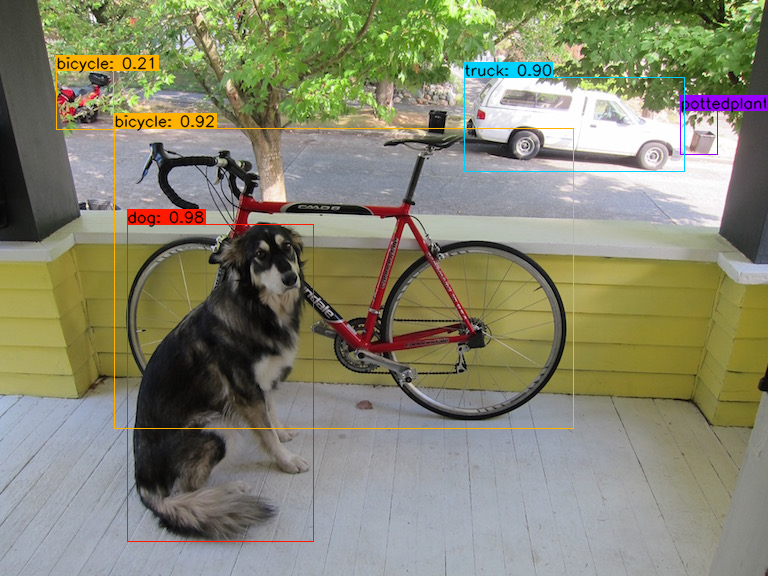

In [ ]:
import os
import colorsys

import numpy as np
from tensorflow.keras import backend as K
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Input

from yolo4.model import yolo_eval, yolo4_body
from yolo4.utils import letterbox_image

from PIL import Image, ImageFont, ImageDraw
from timeit import default_timer as timer
import cv2
from google.colab.patches import cv2_imshow

from decode_np import Decode


def get_class(classes_path):
    classes_path = os.path.expanduser(classes_path)
    with open(classes_path) as f:
        class_names = f.readlines()
    class_names = [c.strip() for c in class_names]
    return class_names

def get_anchors(anchors_path):
    anchors_path = os.path.expanduser(anchors_path)
    with open(anchors_path) as f:
        anchors = f.readline()
    anchors = [float(x) for x in anchors.split(',')]
    return np.array(anchors).reshape(-1, 2)

if __name__ == '__main__':
    model_path = 'yolo4_weight.h5' # default pretrained weights
    #model_path = 'logs/000/'+'ep018-loss25.846.h5' # voc 2007 neck
    #model_path = 'logs/000/'+'ep046-loss6.901.h5' # raccoon neck
    #model_path = 'ep009-loss3.856.h5' # raccoon fine tuned
    #model_path = 'logs-fine/000/'+ 'ep028-loss3.622.h5' # voc 2012 fine
    anchors_path = 'model_data/yolo4_anchors.txt'
    #classes_path = 'model_data/voc_classes.txt'
    #classes_path = 'model_data/raccoon_classes.txt'
    classes_path = 'model_data/coco_classes.txt'

    class_names = get_class(classes_path)
    anchors = get_anchors(anchors_path)

    num_anchors = len(anchors)
    num_classes = len(class_names)

    model_image_size = (608, 608)

    # conf threshold and nms_iou threshold
    conf_thresh = 0.2
    nms_thresh = 0.45

    yolo4_model = yolo4_body(Input(shape=model_image_size+(3,)), num_anchors//3, num_classes)  
    yolo4_model.summary()
    #from tensorflow.keras.utils import plot_model
    #plot_model(yolo4_model, to_file='model.png')

    model_path = os.path.expanduser(model_path)
    assert model_path.endswith('.h5'), 'Keras model or weights must be a .h5 file.'

    yolo4_model.load_weights(model_path)

    _decode = Decode(conf_thresh, nms_thresh, model_image_size, yolo4_model, class_names)

    while True:
        #img = input('Input image filename:')
        try:
            image = cv2.imread('dog.jpg')
        except:
            print('Open Error! Try again!')
            continue
        else:
            image, boxes, scores, classes = _decode.detect_image(image, True)
            cv2_imshow(image)
            #cv2.imshow('image', image)
            #cv2.imwrite('output.jpg', image)
            #cv2.waitKey(0)
            #cv2.destroyAllWindows()
        break

    #yolo4_model.close_session()

In [ ]:
!ls data/VOC2012/JPEGImages/ | tail +10 | head -10

2007_000123.jpg
2007_000129.jpg
2007_000170.jpg
2007_000175.jpg
2007_000187.jpg
2007_000241.jpg
2007_000243.jpg
2007_000250.jpg
2007_000256.jpg
2007_000272.jpg


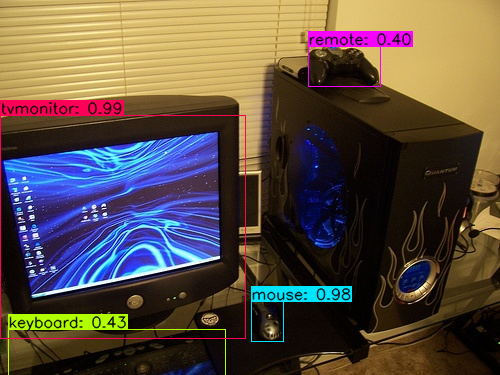

In [ ]:
image = cv2.imread('data/VOC2012/JPEGImages/2007_000187.jpg')
image, boxes, scores, classes = _decode.detect_image(image, True)
cv2_imshow(image)

# mAP의 계산


**Precision(정확도)**  
$ \begin{align}
Precision &= {TP \over TP+FP} 
\end{align} $  

**Recall(재현율)**  
$ \begin{align}
Recall &= {TP \over TP+FN}  = {TP \over all\ ground\ truth}
\end{align} $  

**mAP 계산을 위한 Precision-Recall표의 예시(GT의 총 수=15)**

|Confidence|Detection|Correct?|누적TP|Precision|Recall    |
|----------|---------|--------|-----|---------|----------|
|0.98      |car003   |TP      |1    |1/1=1    |1/15=0.067|
|0.91      |car010   |TP      |2    |2/2=1    |2/15=0.13 |
|0.85      |car001   |TP      |3    |3/3=1    |3/15=0.2  |
|0.81      |car002   |TP      |4    |4/4=1    |4/15=0.27 |
|0.78      |car201   |TP      |5    |5/5=1    |5/15=0.33 |
|0.68      |car007   |FP      |5    |5/6=0.83 |5/15=0.33 |
|0.57      |car030   |TP      |6    |6/7=0.86 |6/15=0.4  |
|0.45      |car112   |TP      |7    |7/8=0.88 |7/15=0.47 |
|0.43      |car009   |FF      |7    |7/9=0.78 |7/15=0.47 |
|0.13      |car004   |FF      |7    |7/10=0.7 |7/15=0.47 |

**Precision-Recall Graph (위의 표와는 다른 데이터임)**  

![](https://user-images.githubusercontent.com/15831541/43008995-64dd53ce-8c34-11e8-8a2c-4567b1311910.png)  
(이미지 출처: https://github.com/Cartucho/mAP )  


**Average Precision**  
Precision Recall 그래프의 아래쪽 면적  

**mAP(mean average precision**  
각 클래스의 AP의 평균

**mAP 참고 블로그**  
https://jonathan-hui.medium.com/map-mean-average-precision-for-object-detection-45c121a31173  
https://bskyvision.com/465  



In [ ]:
!mkdir -p logs/000

In [ ]:
import gdown
md5 = '951708b9aabac7e348f61766863003fc'
url = 'https://drive.google.com/uc?id=1z7lzDVotjMkSysq0s3FTIqi1DIizLJRO'
output = 'logs/000/ep028-loss3.622.h5'
#gdown.download(url, output, quiet=False)
gdown.cached_download(url, output, md5=md5)


Cached Downloading: logs/000/ep028-loss3.622.h5
Downloading...
From: https://drive.google.com/uc?id=1z7lzDVotjMkSysq0s3FTIqi1DIizLJRO
To: /root/.cache/gdown/tmpniqcoszo/dl
100%|██████████| 257M/257M [00:01<00:00, 186MB/s]


Computing MD5: logs/000/ep028-loss3.622.h5
MD5 matches: logs/000/ep028-loss3.622.h5


'logs/000/ep028-loss3.622.h5'

In [ ]:
import numpy as np
from tensorflow import keras
import tensorflow.keras.backend as K
from timeit import default_timer as timer

import skimage.io as io
import skimage.transform as transform
import os, glob, time

import cv2

from decode_np import Decode

def search_all_files_return_by_time_reversed(path, reverse=True):
    return sorted(glob.glob(os.path.join(path, '*.h5')), key=lambda x: time.strftime("%Y-%m-%d %H:%M:%S", time.localtime(os.path.getctime(x))), reverse=reverse)

class Evaluate(keras.callbacks.Callback):
    """ Evaluation callback for arbitrary datasets.
    """

    def __init__(
        self,
        model_body=None,
        anchors=None,
        class_names=None,
        iou_threshold=0.45,
        score_threshold=0.5,
        max_boxes=450,
        tensorboard=None,
        weighted_average=False,
        eval_file='2007_val.txt',
        log_dir='logs/000/',
        verbose=1
    ):
        """ Evaluate a given dataset using a given model at the end of every epoch during training.

        # Arguments
            iou_threshold    : The threshold used to consider when a detection is positive or negative.
            score_threshold  : The score confidence threshold to use for detections.
            max_detections   : The maximum number of detections to use per image.
            save_path        : The path to save images with visualized detections to.
            tensorboard      : Instance of keras.callbacks.TensorBoard used to log the mAP value.
            weighted_average : Compute the mAP using the weighted average of precisions among classes.
            verbose          : Set the verbosity level, by default this is set to 1.
        """
        self.model_body      = model_body
        self.anchors         = anchors
        self.class_names     = class_names
        self.iou_threshold   = iou_threshold
        self.score_threshold = score_threshold
        self.max_boxes       = max_boxes
        self.tensorboard     = tensorboard
        self.weighted_average = weighted_average
        self.eval_file       = eval_file
        self.log_dir         = log_dir
        self.verbose         = verbose

        # The score threshold and nms_iou threshold during verification
        conf_thresh = score_threshold
        nms_thresh = 0.45

        self._decode = Decode(conf_thresh, nms_thresh, (608,608), self.model_body, self.class_names)

        super(Evaluate, self).__init__()

    def calc_image(self, image, model_image_size=(608, 608)):
        start = timer()

        image, boxes, scores, classes = self._decode.detect_image(image, False)

        end = timer()
        #print(end - start)

        return boxes, scores, classes


    def calc_result(self, epoch):
        with open(self.eval_file) as f:
            lines = f.readlines()
        a = np.random.shuffle(lines)

        result_file = open('eval_result_{}.txt'.format(epoch+1), 'w')
        count = 0
        #for annotation_line in lines[:500]:
        for annotation_line in lines:
            print(count)
            annotation = annotation_line.split()
            image = cv2.imread(annotation[0])
            out_boxes, out_scores, out_classes = self.calc_image(image)
            result_file.write(annotation[0] + ' ')
            if out_boxes is None:
                result_file.write('\n')
                count = count+1
                continue
            for i in range(len(out_boxes)):
                top, left, bottom, right = out_boxes[i]
                result_file.write(' ' + ','.join([str(left), str(top), str(right), str(bottom)]) + ',' + str(out_scores[i]) + ',' + str(out_classes[i]))
            result_file.write('\n')
            count = count+1


    def parse_rec(self, annotations):
        objects = []
        for obj in annotations:
            values = obj.split(',')
            obj_struct = {}
            obj_struct['name'] = values[4]
            obj_struct['difficult'] = 0
            obj_struct['bbox'] = [int(values[0]),
                                  int(values[1]),
                                  int(values[2]),
                                  int(values[3])]
            objects.append(obj_struct)

        return objects


    def voc_ap(self, rec, prec, use_07_metric=False):
        """Compute VOC AP given precision and recall. If use_07_metric is true, uses
        the VOC 07 11-point method (default:False).
        """
        if use_07_metric:
            # 11 point metric
            ap = 0.
            for t in np.arange(0., 1.1, 0.1):
                if np.sum(rec >= t) == 0:
                    p = 0
                else:
                    p = np.max(prec[rec >= t])
                ap = ap + p / 11.
        else:
            # correct AP calculation
            # first append sentinel values at the end
            mrec = np.concatenate(([0.], rec, [1.]))
            mpre = np.concatenate(([0.], prec, [0.]))

            # compute the precision envelope
            for i in range(mpre.size - 1, 0, -1):
                mpre[i - 1] = np.maximum(mpre[i - 1], mpre[i])

            # to calculate area under PR curve, look for points
            # where X axis (recall) changes value
            i = np.where(mrec[1:] != mrec[:-1])[0]

            # and sum (\Delta recall) * prec
            ap = np.sum((mrec[i + 1] - mrec[i]) * mpre[i + 1])
        return ap


    def map_eval(self,
                 result_path,
                 anno_path,
                 classname,
                 ovthresh=0.5,
                 use_07_metric=False):
        """rec, prec, ap = voc_eval(detpath,
                                    annopath,
                                    imagesetfile,
                                    classname,
                                    [ovthresh],
                                    [use_07_metric])
        Top level function that does the PASCAL VOC evaluation.
        result_path: Path to detections
            detpath.format(classname) should produce the detection results file.
        anno_path: Path to annotations
            annopath.format(imagename) should be the xml annotations file.
        classname: Category name (duh)
        [ovthresh]: Overlap threshold (default = 0.5)
        [use_07_metric]: Whether to use VOC07's 11 point AP computation
            (default False)
        """
        # assumes detections are in detpath.format(classname)
        # assumes annotations are in annopath.format(imagename)

        # first load gt
        recs = {}
        imagenames = []
        with open(anno_path, 'r') as f:
            lines = f.readlines()
        for annotation_line in lines:
            annotation = annotation_line.split()
            imagename = annotation[0]
            imagenames.append(imagename)
            recs[imagename] = self.parse_rec(annotation[1:])


        # extract gt objects for this class
        class_recs = {}
        npos = 0
        for imagename in imagenames:
            R = [obj for obj in recs[imagename] if obj['name'] == classname]
            bbox = np.array([x['bbox'] for x in R])
            difficult = np.array([x['difficult'] for x in R]).astype(np.bool)
            det = [False] * len(R)
            npos = npos + sum(~difficult)
            class_recs[imagename] = {'bbox': bbox,
                                     'difficult': difficult,
                                     'det': det}

        # read dets
        with open(result_path, 'r') as f:
            lines = f.readlines()

        image_ids = []
        confidence = []
        BB = []
        for result_line in lines:
            result = result_line.split()
            for obj in result[1:]:
                values = obj.split(',')
                if values[5] == classname:
                    image_ids.append(result[0])
                    confidence.append(float(values[4]))
                    BB.append([float(values[1]), float(values[0]), float(values[3]), float(values[2])])

        confidence = np.reshape(confidence, (len(image_ids)))
        BB = np.reshape(BB, (len(image_ids), 4))

        # sort by confidence
        sorted_ind = np.argsort(-confidence)
        BB = BB[sorted_ind, :]
        image_ids = [image_ids[x] for x in sorted_ind]
        # go down dets and mark TPs and FPs
        nd = len(image_ids)
        tp = np.zeros(nd)
        fp = np.zeros(nd)
        for d in range(nd):
            R = class_recs[image_ids[d]]
            bb = BB[d, :].astype(float)
            ovmax = -np.inf
            BBGT = R['bbox'].astype(float)

            if BBGT.size > 0:
                # compute overlaps
                # intersection
                ixmin = np.maximum(BBGT[:, 0], bb[0])
                iymin = np.maximum(BBGT[:, 1], bb[1])
                ixmax = np.minimum(BBGT[:, 2], bb[2])
                iymax = np.minimum(BBGT[:, 3], bb[3])
                iw = np.maximum(ixmax - ixmin + 1., 0.)
                ih = np.maximum(iymax - iymin + 1., 0.)
                inters = iw * ih

                # union
                uni = ((bb[2] - bb[0] + 1.) * (bb[3] - bb[1] + 1.) +
                       (BBGT[:, 2] - BBGT[:, 0] + 1.) *
                       (BBGT[:, 3] - BBGT[:, 1] + 1.) - inters)

                overlaps = inters / uni
                ovmax = np.max(overlaps)
                jmax = np.argmax(overlaps)

            if ovmax > ovthresh:
                if not R['difficult'][jmax]:
                    if not R['det'][jmax]:
                        tp[d] = 1.
                        R['det'][jmax] = 1
                    else:
                        fp[d] = 1.
            else:
                fp[d] = 1.


        # compute precision recall
        fp = np.cumsum(fp)
        tp = np.cumsum(tp)
        rec = tp / float(npos)
        # avoid divide by zero in case the first detection matches a difficult
        # ground truth
        prec = tp / np.maximum(tp + fp, np.finfo(np.float64).eps)
        ap = self.voc_ap(rec, prec, use_07_metric)

        return rec, prec, ap, nd

    def on_epoch_end(self, epoch, logs=None):
        weight_latest = search_all_files_return_by_time_reversed(self.log_dir)[0]
        print('')
        print("Epoch end eval mAP on weight {}".format(weight_latest))
        self.model_body.load_weights(weight_latest)
        self.calc_result(epoch)

        # calulate mAP
        aps = []
        counts = []
        for classname in self.class_names:
            print(classname)
            rec, prec, ap, count = self.map_eval('eval_result_{}.txt'.format(epoch+1), self.eval_file, classname)
            aps.append(ap)
            counts.append(count)
        aps = np.array(aps)
        counts = np.array(counts)

        mAP = np.sum(aps * counts) / np.sum(counts)

        print('Epoch {} mAP {}'.format(epoch+1, mAP))
        print('')



In [ ]:
def search_all_files_return_by_time_reversed(path, reverse=True):
    return sorted(glob.glob(os.path.join(path, '*.h5')), key=lambda x: time.strftime("%Y-%m-%d %H:%M:%S", time.localtime(os.path.getctime(x))), reverse=reverse)

**아래의 mAP 계산은 실제 실행시간이 30분 정도 소요됩니다.**  

In [ ]:
from train import create_model, get_anchors, get_classes
#from callback_eval import Evaluate


#annotation_train_path = '2012_train.txt'
annotation_val_path = '2012_val.txt'
#annotation_val_path = 'val.txt'
log_dir = 'logs/000'
classes_path = 'model_data/voc_classes.txt'
#classes_path = 'model_data/coco_classes.txt'
anchors_path = 'model_data/yolo4_anchors.txt'
class_names = get_classes(classes_path)
num_classes = len(class_names)
class_index = ['{}'.format(i) for i in range(num_classes)]
anchors = get_anchors(anchors_path)

max_bbox_per_scale = 150

anchors_stride_base = np.array([
    [[12, 16], [19, 36], [40, 28]],
    [[36, 75], [76, 55], [72, 146]],
    [[142, 110], [192, 243], [459, 401]]
])
# Some preprocessing
anchors_stride_base = anchors_stride_base.astype(np.float32)
anchors_stride_base[0] /= 8
anchors_stride_base[1] /= 16
anchors_stride_base[2] /= 32

input_shape = (608, 608) # multiple of 32, hw

#model_path = 'yolo4_weight.h5'
#model_path = 'logs/000/'+'ep001-loss5261.659.h5'
#model_path = 'logs-neck/000/'+'ep050-loss5.966.h5' # neck for voc2012
model_path='logs/000/ep028-loss3.622.h5'

model, model_body = create_model(input_shape, anchors_stride_base, num_classes,
    load_pretrained=True, freeze_body=2,
    weights_path=model_path)

evaluation = Evaluate(model_body=model_body, anchors=anchors, class_names=class_index, score_threshold=0.05,
    weighted_average=True, eval_file=annotation_val_path, log_dir=log_dir)
evaluation.on_epoch_end(27)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
845
846
847
848
849
850
851
852
853
854
855
856
857
858
859
860
861
862
863
864
865
866
867
868
869
870
871
872
873
874
875
876
877
878
879
880
881
882
883
884
885
886
887
888
889
890
891
892
893
894
895
896
897
898
899
900
901
902
903
904
905
906
907
908
909
910
911
912
913
914
915
916
917
918
919
920
921
922
923
924
925
926
927
928
929
930
931
932
933
934
935
936
937
938
939
940
941
942
943
944
945
946
947
948
949
950
951
952
953
954
955
956
957
958
959
960
961
962
963
964
965
966
967
968
969
970
971
972
973
974
975
976
977
978
979
980
981
982
983
984
985
986
987
988
989
990
991
992
993
994
995
996
997
998
999
1000
1001
1002
1003
1004
1005
1006
1007
1008
1009
1010
1011
1012
1013
1014
1015
1016
1017
1018
1019
1020
1021
1022
1023
1024
1025
1026
1027
1028
1029
1030
1031
1032
1033
1034
1035
1036
1037
1038
1039
1040
1041
1042
1043
1044
1045
1046
1047
1048
1049
1050
1051
1052
1053
1054
1055
1056
1057
1058
1059
1060
1061
1062
1063
1064
1065
1066
1067
1068

# **샘플 데이터를 이용한 mAP의 계산**

|Confidence|Detection|Correct?|누적TP|Precision|Recall    |
|----------|---------|--------|-----|---------|----------|
|0.98      |car003   |TP      |1    |1/1=1    |1/15=0.067|
|0.91      |car010   |TP      |2    |2/2=1    |2/15=0.13 |
|0.85      |car001   |TP      |3    |3/3=1    |3/15=0.2  |
|0.81      |car002   |TP      |4    |4/4=1    |4/15=0.27 |
|0.78      |car201   |TP      |5    |5/5=1    |5/15=0.33 |
|0.68      |car007   |FP      |5    |5/6=0.83 |5/15=0.33 |
|0.57      |car030   |TP      |6    |6/7=0.86 |6/15=0.4  |
|0.45      |car112   |TP      |7    |7/8=0.88 |7/15=0.47 |
|0.43      |car009   |FF      |7    |7/9=0.78 |7/15=0.47 |
|0.13      |car004   |FF      |7    |7/10=0.7 |7/15=0.47 |


In [ ]:
import numpy as np
class_names = ['car'] # 한 개의 class에 대해서만 계산
npos = 15 # 총 GT의 갯수는 15개라고 가정  
detection = ['car001', 'car002', 'car003', 'car004', 'car007', 'car009', 'car010', 'car030', 'car112', 'car201']
confidence = np.array([0.85, 0.81, 0.98, 0.13, 0.68, 0.43, 0.91, 0.57, 0.45, 0.78])
tp =         np.array([1,    1,    1,    0,    0,    0,    1,    1,    1,    1   ])
fp =         np.array([0,    0,    0,    1,    1,    1,    0,    0,    0,    0   ])

# sort by confidence (confidence가 큰 순으로 정렬)
sorted_ind = np.argsort(-confidence)
tp = tp[sorted_ind]
fp = fp[sorted_ind]

print('sorted tp =', tp)
print('sorted fp =', fp)

# 누적 precision recall의 계산
fp = np.cumsum(fp)
tp = np.cumsum(tp)
rec = tp / float(npos)  # 누적 tp를 GT의 갯수로 나눔
prec = tp / (tp + fp)
print('prec =', prec)
print('rec =', rec)

# AP (average precision의 계산)
def voc_ap(rec, prec):
    # correct AP calculation
    # first append sentinel values at the end
    mrec = np.concatenate(([0.], rec, [1.]))
    mpre = np.concatenate(([0.], prec, [0.]))

    # compute the precision envelope
    for i in range(mpre.size - 1, 0, -1):
        mpre[i - 1] = np.maximum(mpre[i - 1], mpre[i])

    # to calculate area under PR curve, look for points
    # where X axis (recall) changes value
    i = np.where(mrec[1:] != mrec[:-1])[0]

    # and sum (\Delta recall) * prec
    ap = np.sum((mrec[i + 1] - mrec[i]) * mpre[i + 1])
    return ap

# calulate mAP
aps = []
counts = []
for classname in class_names:
    ap = voc_ap(rec, prec)
    count = 5    # 총 이미지 수는 5개라고 가정
    print('%s: AP = %g'%(classname, ap))
    aps.append(ap)
    counts.append(count)
    aps = np.array(aps)
    counts = np.array(counts)

mAP = np.sum(aps * counts) / np.sum(counts)

print('mAP = {}'.format(mAP))


sorted tp = [1 1 1 1 1 0 1 1 0 0]
sorted fp = [0 0 0 0 0 1 0 0 1 1]
prec = [1.         1.         1.         1.         1.         0.83333333
 0.85714286 0.875      0.77777778 0.7       ]
rec = [0.06666667 0.13333333 0.2        0.26666667 0.33333333 0.33333333
 0.4        0.46666667 0.46666667 0.46666667]
car: AP = 0.45
mAP = 0.45


**AP는 다음에 표시되는 그래프의 아래 주황색 영역의 면적을 의미한다**

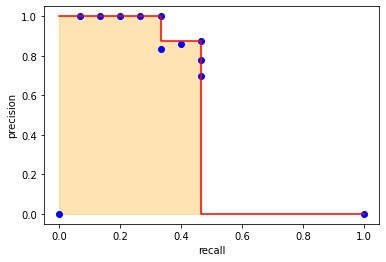

In [ ]:
import matplotlib.pyplot as plt

mrec = np.concatenate(([0.], rec, [1.]))
mpre = np.concatenate(([0.], prec, [0.]))

mpre_fix = mpre.copy()
mrec_fix = mrec.copy()

# compute the precision envelope
for i in range(mpre.size - 1, 0, -1):
    mpre_fix[i - 1] = np.maximum(mpre[i - 1], mpre_fix[i])

# area fix
for i in range(mpre.size - 1, 0, -1):
    if (mpre_fix[i-1] != mpre_fix[i]) and (mrec_fix[i-1] != mrec_fix[i]):
        mpre_fix = np.concatenate((mpre_fix[:i], mpre_fix[i:i+1], mpre_fix[i:]))
        mrec_fix = np.concatenate((mrec_fix[:i], mrec_fix[i-1:i], mrec_fix[i:]))

plt.figure()
plt.plot(mrec, mpre, 'bo')
plt.plot(mrec_fix, mpre_fix, color='red')
plt.fill_between(mrec_fix, mpre_fix, color='orange', alpha=0.3)
plt.xlabel('recall')
plt.ylabel('precision')
plt.show()

In [ ]:
# 직접 그래프와 데이터를 보고 AP 계산해보기
# 0, 0.33333333사이에서는 1.0이고 0.33333333, 0.46666667사이에서는 8.875이고 나머지는 0이다.
1.0*(0.33333333-0.0) + 0.875*(0.46666667 - 0.33333333) + 0*(1 - 0.46666667)

0.4500000025